<h4><b>Feature Engineering- Classification using Optimal Variable Selection method for car purchase dataset</b></h4>

In [2]:
# pandas module imported
# as well as seaborn and 
# matplotlib.pyplot modules
import pandas as pd

# boxplot version
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("car_purchasingNew.csv", encoding='ISO-8859-1')
df.head()

,customer name,JobTitle,customer e-mail,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [3]:
# the columns name were named
df.rename(columns={'customer name': 'customer_name', 
                   'customer e-mail': 'customer_email',
                     'net worth': 'net_worth',
                       'credit card debt':'credit_card_debt', 'car purchase amount':'car_purchase_amount'}, inplace=True)

In [4]:
# here I did drop some of these variables
df = df.drop(['customer_name', 'JobTitle', 'customer_email', 'country', 'gender', 'Benefits'], axis=1)
 
# For the purpose of visualizations. its imperative binning creates a categorical variable
# as it is a continuous variable (car_purchase_amoun), making visualizations easy here
# And the bins create the car_purchase_amount into five categories

df = df.query('car_purchase_amount < car_purchase_amount.quantile(q=0.98)')

df['binned_car_purchase_amount'] = pd.cut(df['car_purchase_amount'], bins=5, labels=['Low', 'Below Average', 'Average', 'Above Average', 'High'])

<h4><b>Here, I used the tool VIF</b></h4>

In [5]:
df.columns

Index(['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net_worth',
       'car_purchase_amount', 'binned_car_purchase_amount'],
      dtype='object')

In [6]:
df

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net_worth,car_purchase_amount,binned_car_purchase_amount
0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.380910,238961.2505,35321.45877,Average
1,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.957136,530973.9078,45115.52566,Above Average
2,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.355060,638467.1773,42925.70921,Average
4,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.712177,560304.0671,55915.46248,High
5,57,118602.00,8601.00,189082.74,316285.74,316285.74,14179.472440,428485.3604,56611.99784,High
...,...,...,...,...,...,...,...,...,...,...
495,41,87384.60,97729.16,837.79,185951.55,185951.55,6995.902524,541670.1016,48901.44342,Above Average
496,38,123105.00,38790.92,23865.00,185760.92,185760.92,12301.456790,360419.0988,31491.41457,Below Average
497,54,185724.50,0.00,0.00,185724.50,185724.50,10611.606860,764531.3203,64147.28888,High
498,59,185724.50,0.00,0.00,185724.50,185724.50,14013.034510,337826.6382,45442.15353,Above Average


In [7]:
# pip install statsmodels
# this will show if there are multicollinearity features 
# in the dataset.
# As well as medium multicollinearity variables
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables are listed below
# leave out the target variable! (dependent variable)
X = df[['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net_worth']]

# have only the target variable here (dependent variable)
y = df['car_purchase_amount']

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, potentially confusing the ML algorithm
# this might be good info when deciding if some variable needs to be removed
vif_data

c:\Users\User\AdvancedData2024\AdvDataAnalytics2024\venv310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,age,22.723186
1,BasePay,inf
2,OvertimePay,inf
3,OtherPay,inf
4,TotalPay,inf
5,TotalPayBenefits,inf
6,credit_card_debt,8.039532
7,net_worth,6.863231


<h4>The Variance Inflation Factor (VIF) analysis reveals multicollinearity in the dataset</h4>
<h4>High multicollinearity- these variables BasePay, OvertimePay, OtherPay, TotalPay, and TotalPayBenefits have VIF values of infinity (inf), indicating perfect or near-perfect linear relationships among these variables. I think they can be tagged redundancy which may confuse the ML model and reduce predictive accuracy.</h4>
<h4>Mild multicollinearity- credit_card_debt (VIF ≈ 8) and net_worth (VIF ≈ 6.9) show moderate multicollinearity, which could still affect model performance.</h4>
<h4>Subsequently, I might consider removing or combining highly correlated features such as the pay-related variables to reduce multicollinearity and improve model interpretability. And it can be deduced that features 'age', 'credit_card_debt' and 'net_worth' are crucial for the predictions of the model</h4>

In [8]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   age                         490 non-null    int64   
 1   BasePay                     490 non-null    float64 
 2   OvertimePay                 490 non-null    float64 
 3   OtherPay                    490 non-null    float64 
 4   TotalPay                    490 non-null    float64 
 5   TotalPayBenefits            490 non-null    float64 
 6   credit_card_debt            490 non-null    float64 
 7   net_worth                   490 non-null    float64 
 8   car_purchase_amount         490 non-null    float64 
 9   binned_car_purchase_amount  490 non-null    category
dtypes: category(1), float64(8), int64(1)
memory usage: 39.0 KB
None
age                           0
BasePay                       0
OvertimePay                   0
OtherPay                      0
TotalPa

<h4><b>Here, I used the SHAP tool to determine the relevant variables in the dataset</b></h4>

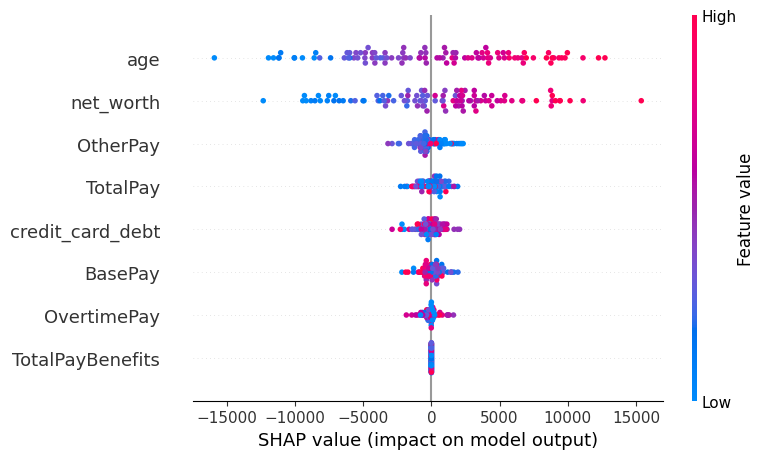

Feature Importances using SHAP:
            Feature   Importance
0               age  5236.109863
1           BasePay   523.882080
2       OvertimePay   340.522583
3          OtherPay   818.260681
4          TotalPay   664.755859
5  TotalPayBenefits     0.000000
6  credit_card_debt   652.442017
7         net_worth  4212.282227


In [9]:
# install shap for our notebook
# pip install shap
# import necessary modules
# shows how important are the variables in te dataset
import shap
import xgboost as xgb
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# load data
df = pd.read_csv("car_purchasingNew.csv", encoding='ISO-8859-1')

# the columns name were named
df.rename(columns={'customer name': 'customer_name', 
                   'customer e-mail': 'customer_email',
                     'net worth': 'net_worth',
                       'credit card debt':'credit_card_debt', 'car purchase amount':'car_purchase_amount'}, inplace=True)

# handle these better with your own dataset, here we are simply dropping these
df = df.drop(['customer_name', 'JobTitle', 'customer_email', 'country', 'gender', 'Benefits'], axis=1)

# Define features and target
X = df[['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net_worth']]

y = df['car_purchase_amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# use GPU-enabled XGBoost Regressor
model = xgb.XGBRegressor(tree_method='hist', device="cpu")
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)

# Feature importance using SHAP values
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.mean(np.abs(shap_values.values), axis=0)  # shap_values.values for the matrix
})

print("Feature Importances using SHAP:")
print(importance)

<h4>Highly dominat feature- such as 'age' which is the most influential feature with an importance value of 5236.11, indicating it has the strongest impact on predicting car_purchase_amount. And 'net_worth' the second most important feature with a value of 4212.28, suggesting it plays a significant role in determining car purchase behavior.</h4>
<h4>Moderately important features- are OtherPay (818.26), BasePay (523.88), TotalPay (664.76), and credit_card_debt (652.44) they obviously contributed to the model but have less impact compared to age and net_worth.</h4>
<h4>Less important features- I think 'OvertimePay' with a value of 340.52, though its impact is lower than other financial-related features, but it is still non-negligible. While 'TotalPayBenefits' has an importance of 0.00, which indicating it does not contribute to the model's predictions. This could suggest redundancy or irrelevance for this dataset.</h4>

<h4> <b> I think there is an excellent correlation or comparisms between the two tools/method above </b> </h4>

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
from sklearn import metrics

# Predict on the test set
test_predictions = model.predict(X_test)

In [11]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "%")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "%^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "%")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
6394.87 %

MSE
65447724.75 %^2

RMSE:
8089.98 %

R-squared:
0.46

Explained variance score:
0.46
